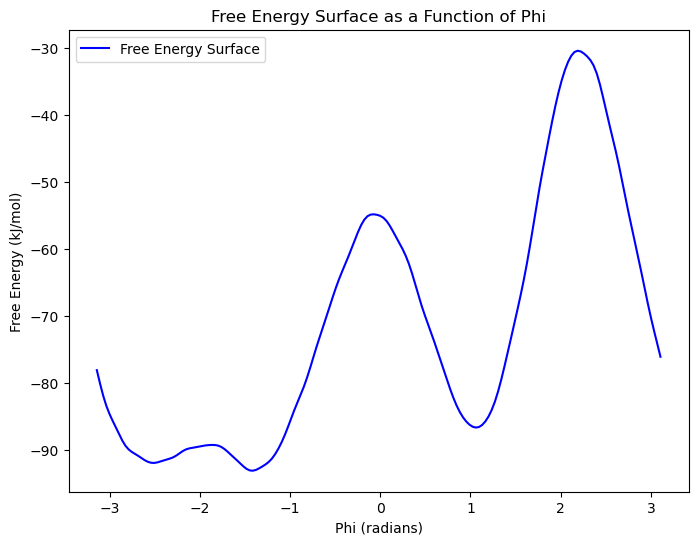

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the FES data
fes_data = np.loadtxt('fes.dat')

# Extract phi and free energy (assuming 1st and 2nd columns are phi and free energy)
phi = fes_data[:, 0]  # Phi (radians)
free_energy = fes_data[:, 1]  # Free energy (kJ/mol)

# Plot Free Energy vs Phi
plt.figure(figsize=(8, 6))
plt.plot(phi, free_energy, label='Free Energy Surface', color='blue')
plt.xlabel('Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy Surface as a Function of Phi')
plt.legend()
plt.savefig('Step3_Figures/fes_vs_phi.png')
plt.show()


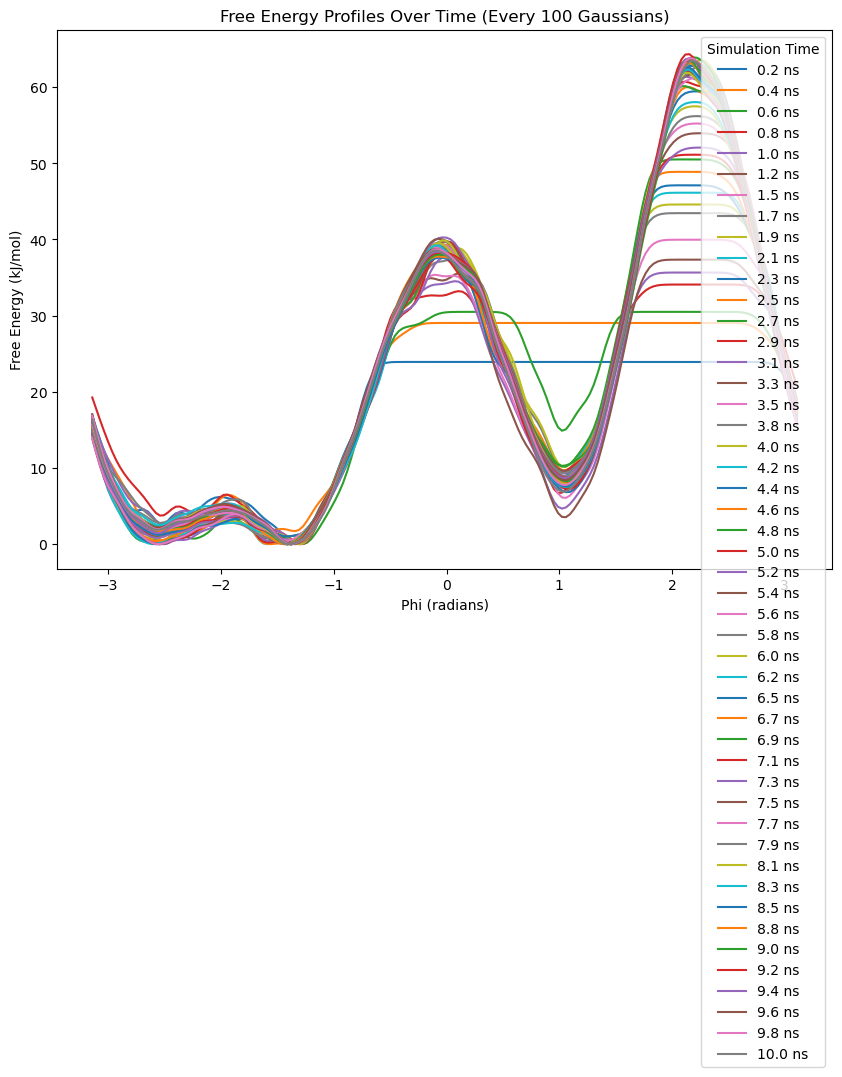

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of files to load and plot
num_profiles = 48  # Adjust this number based on the number of files
phi_values = None
free_energy_profiles = []

# Time labels based on Gaussian depositions (assuming 10 ns total time and 100 kernels per stride)
total_time_ns = 10  # Total time of the simulation in ns
stride = 100  # The number of Gaussian kernels per stride
time_per_stride = total_time_ns / num_profiles  # Time interval per profile

# Load all the FES profiles
for i in range(1, num_profiles + 1):
    filename = f'Step2_Con_Output/fes_stride100.dat{i}.dat'
    fes_data = np.loadtxt(filename)
    
    if phi_values is None:
        phi_values = fes_data[:, 0]  # Extract phi values (radians) from the first file
    
    free_energy_profiles.append(fes_data[:, 1])  # Extract free energy column and store it

# Plot all the free energy profiles
plt.figure(figsize=(10, 7))
for i, free_energy in enumerate(free_energy_profiles):
    time_label = f'{(i + 1) * time_per_stride:.1f} ns'  # Generate time label in ns
    plt.plot(phi_values, free_energy, label=f'{time_label}')

# Add labels and title
plt.xlabel('Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy Profiles Over Time (Every 100 Gaussians)')
plt.legend(loc='best', title='Simulation Time')
plt.savefig('Step3_Figures/fes_profiles_over_time.png')  # Save the figure
plt.show()


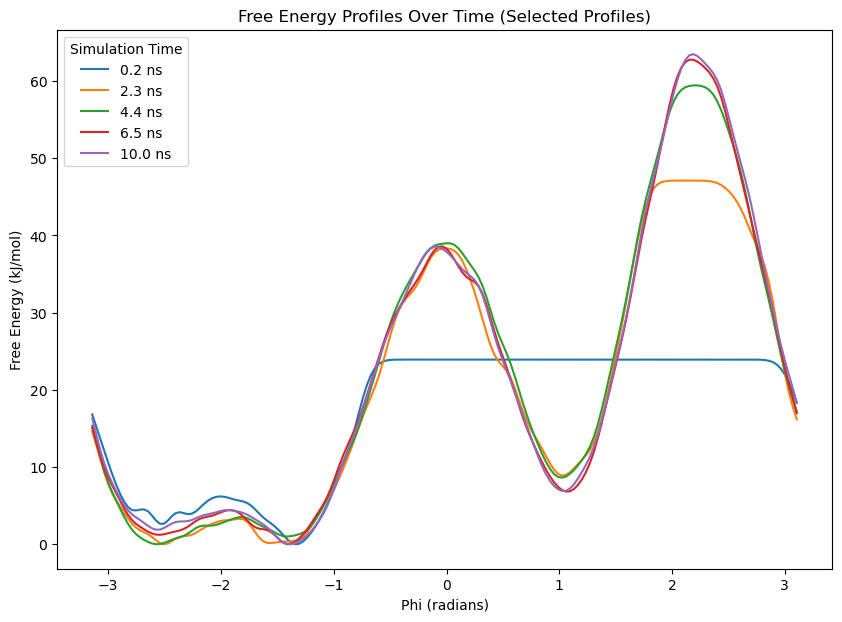

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of files to load and plot
num_profiles = 48  # Total number of files
selected_profiles = [0, 10, 20, 30, 47]  # Choose five profiles: start, middle, end (adjust these)

phi_values = None
free_energy_profiles = []

# Time labels based on Gaussian depositions (assuming 10 ns total time and 100 kernels per stride)
total_time_ns = 10  # Total time of the simulation in ns
stride = 100  # The number of Gaussian kernels per stride
time_per_stride = total_time_ns / num_profiles  # Time interval per profile

# Load only the selected profiles
for i in selected_profiles:
    filename = f'Step2_Con_Output/fes_stride100.dat{i+1}.dat'
    fes_data = np.loadtxt(filename)
    
    if phi_values is None:
        phi_values = fes_data[:, 0]  # Extract phi values (radians) from the first file
    
    free_energy_profiles.append((fes_data[:, 1], (i + 1) * time_per_stride))  # Store free energy and time

# Plot selected free energy profiles
plt.figure(figsize=(10, 7))
for free_energy, time_ns in free_energy_profiles:
    plt.plot(phi_values, free_energy, label=f'{time_ns:.1f} ns')  # Label with time in ns

# Add labels and title
plt.xlabel('Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy Profiles Over Time (Selected Profiles)')
plt.legend(loc='best', title='Simulation Time')
plt.savefig('Step3_Figures/fes_selected_profiles_over_time_concise.png')  # Save the figure (Concise haha)
plt.show()
